# 0. LIBRERIAS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATASETs PREPROCESADOS

In [2]:
df1 = pd.read_excel('/content/df_2012_preproc_10s.xlsx', index_col="timestamp")
df2 = pd.read_excel('/content/df_2014_preproc_10s.xlsx', index_col="timestamp")
df3 = pd.read_excel('/content/df_2015_preproc_10s.xlsx', index_col="timestamp")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23954 entries, 2012-06-01 17:50:20 to 2012-06-04 12:22:30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P-JUS-CKP  23954 non-null  float64
 1   P-MON-CKP  23954 non-null  float64
 2   P-PDG      23954 non-null  float64
 3   P-TPT      23954 non-null  float64
 4   T-MON-CKP  23954 non-null  float64
 5   T-PDG      23954 non-null  float64
 6   T-TPT      23954 non-null  float64
 7   class      23954 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.6+ MB


## 1. SMOOTHING a dfs procesados

In [4]:
#Amplitud de picos
from scipy.signal import find_peaks, peak_widths

def peaksearch(df, feature):
  peaks, _ = find_peaks(df[feature])
  duration = peak_widths(df[feature], peaks, rel_height=1)#The peak_widths function returns a tuple containing: widths, peak_heights, left_ips, and right_ips
  durations = duration[0] #irst element from the duration tuple
  #peak_durations = [peak_times[i+1] - peak_times[i] for i in range(len(peak_times) - 1)]
  mean_dur = np.mean(durations)
  median_dur= np.median(durations)
  max_dur = max(durations)
  min_dur = min(durations)
  return mean_dur, median_dur, max_dur, min_dur

mean_dur1, median_dur1, max_dur1, min_dur1 = peaksearch(df1, 'T-PDG')
print(f"df1 T-PDG: Mean Duration = {round(mean_dur1, 1)}, Median Duration = {round(median_dur1, 1)}, Max Duration = {round(max_dur1, 1)}, Min Duration = {round(min_dur1, 1)}")

mean_dur1_P, median_dur1_P, max_dur1_P, min_dur1_P = peaksearch(df1, 'P-PDG')
print(f"df1 P-PDG: Mean Duration = {round(mean_dur1_P, 1)}, Median Duration = {round(median_dur1_P, 1)}, Max Duration = {round(max_dur1_P, 1)}, Min Duration = {round(min_dur1_P, 1)}")

mean_dur2, median_dur2, max_dur2, min_dur2 = peaksearch(df2, 'T-PDG')
print(f"df2 T-PDG: Mean Duration = {round(mean_dur2, 1)}, Median Duration = {round(median_dur2, 1)}, Max Duration = {round(max_dur2, 1)}, Min Duration = {round(min_dur2, 1)}")

mean_dur2_P, median_dur2_P, max_dur2_P, min_dur2_P = peaksearch(df2, 'P-PDG')
print(f"df2 P-PDG: Mean Duration = {round(mean_dur2_P, 1)}, Median Duration = {round(median_dur2_P, 1)}, Max Duration = {round(max_dur2_P, 1)}, Min Duration = {round(min_dur2_P, 1)}")

mean_dur3, median_dur3, max_dur3, min_dur3 = peaksearch(df3, 'T-PDG')
print(f"df3 T-PDG: Mean Duration = {round(mean_dur3, 1)}, Median Duration = {round(median_dur3, 1)}, Max Duration = {round(max_dur3, 1)}, Min Duration = {round(min_dur3, 1)}")

mean_dur3_P, median_dur3_P, max_dur3_P, min_dur3_P = peaksearch(df3, 'P-PDG')
print(f"df3 P-PDG: Mean Duration = {round(mean_dur3_P, 1)}, Median Duration = {round(median_dur3_P, 1)}, Max Duration = {round(max_dur3_P, 1)}, Min Duration = {round(min_dur3_P, 1)}")

df1 T-PDG: Mean Duration = 26.1, Median Duration = 2.9, Max Duration = 9954.9, Min Duration = 1.0
df1 P-PDG: Mean Duration = 45.9, Median Duration = 2.8, Max Duration = 6950.9, Min Duration = 1.0
df2 T-PDG: Mean Duration = 12.2, Median Duration = 5.0, Max Duration = 2804.0, Min Duration = 1.0
df2 P-PDG: Mean Duration = 17.3, Median Duration = 4.3, Max Duration = 1536.0, Min Duration = 1.0
df3 T-PDG: Mean Duration = 14.3, Median Duration = 5.0, Max Duration = 3302.8, Min Duration = 1.0
df3 P-PDG: Mean Duration = 18.6, Median Duration = 5.7, Max Duration = 2028.0, Min Duration = 1.0


In [5]:
median_median = np.median([median_dur1, median_dur2, median_dur3, median_dur1_P, median_dur2_P,median_dur3_P])
median_median

np.float64(4.624639578371898)

In [6]:
median_mean = np.mean([median_dur1, median_dur2, median_dur3, median_dur1_P, median_dur2_P,median_dur3_P])
median_mean

np.float64(4.295596488021488)

In [7]:
T_PDG_peak_mean = (mean_dur1 + mean_dur2 + mean_dur3) /3
P_PDG_peak_mean = (mean_dur1_P + mean_dur2_P + mean_dur3_P) /3
TP_PDG_peak_mean = (T_PDG_peak_mean + P_PDG_peak_mean ) /2

print(f"peak_mean_dur:  T-PDG: {round(T_PDG_peak_mean, 1)}, P-PDG: {round(P_PDG_peak_mean, 1)}, TP-PDG: {round(TP_PDG_peak_mean, 1)}")

peak_mean_dur:  T-PDG: 17.5, P-PDG: 27.3, TP-PDG: 22.4


In [8]:
#Moving Average de 1 min en T y P 2012, 2014 y 2015: la mayor mediana
T=['T-PDG']
P=['P-PDG']

#columns_to_fe = ['P-PDG', 'T-PDG']

#Define window size
window_size = 6 #de 10 s

pdg_T_df1 = df1[T].rolling(window=window_size, min_periods=1).median()
pdg_P_df1 = df1[P].rolling(window=window_size, min_periods=1).median()
pdg_T_df2 = df2[T].rolling(window=window_size, min_periods=1).median()
pdg_P_df2 = df2[P].rolling(window=window_size, min_periods=1).median()
pdg_T_df3 = df3[T].rolling(window=window_size, min_periods=1).median()
pdg_P_df3 = df3[P].rolling(window=window_size, min_periods=1).median()

df_2012_pdg_ma = df1.copy()
df_2014_pdg_ma = df2.copy()
df_2015_pdg_ma = df3.copy()

df_2012_pdg_ma['T-PDG']=pdg_T_df1['T-PDG']
df_2014_pdg_ma['T-PDG']=pdg_T_df2['T-PDG']
df_2015_pdg_ma['T-PDG']=pdg_T_df3['T-PDG']

df_2012_pdg_ma['P-PDG']=pdg_P_df1['P-PDG']
df_2014_pdg_ma['P-PDG']=pdg_P_df2['P-PDG']
df_2015_pdg_ma['P-PDG']=pdg_P_df3['P-PDG']

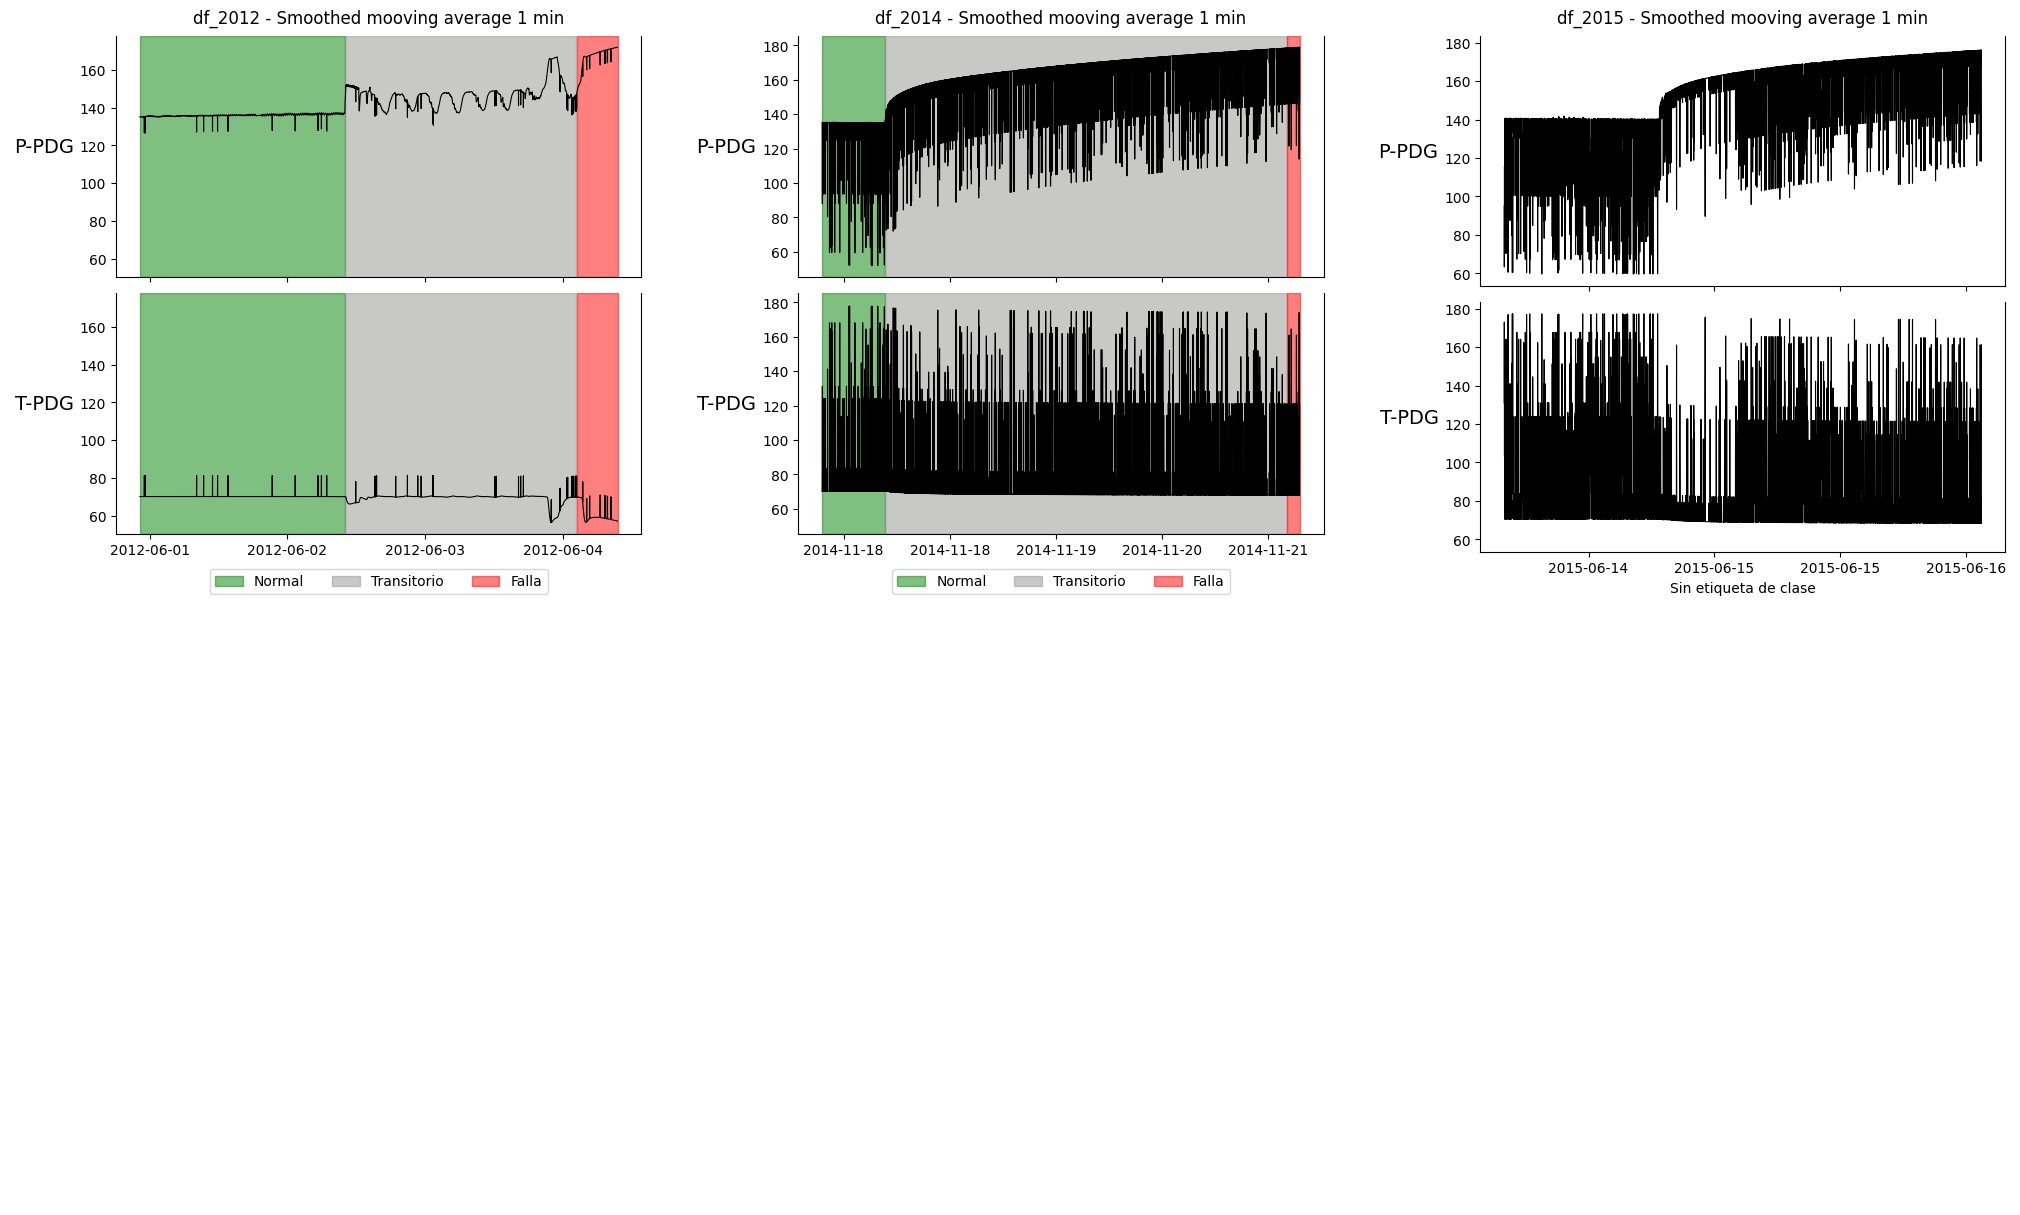

In [9]:
### Mooving average smoothing 1 min
j = 0
plot_columns = ['P-PDG','T-PDG']

filas = len(plot_columns)
fig = plt.figure(constrained_layout=True, figsize=(20, 12))
subfigs = fig.subfigures(filas, 3, wspace=0.07)
dfs = {'df_2012_pdg_ma': df_2012_pdg_ma,'df_2014_pdg_ma': df_2014_pdg_ma, 'df_2015_pdg_ma': df_2015_pdg_ma}
for key in ['df_2012_pdg_ma','df_2014_pdg_ma']:

  df = dfs[key]
  ax1 = subfigs.ravel()[j].subplots(filas, 1, sharex=True, sharey=True)

  Bgn_normal = df[df['class'] == "Normal"].index[0]
  End_normal = df[df['class'] == "Normal"].index[-1]
  Bgn_transient = df[df['class'] == "Transitorio"].index[0]
  End_transient = df[df['class'] == "Transitorio"].index[-1]
  Bgn_FaultySS = df[df['class'] == "Falla"].index[0]
  End_FaultySS = df[df['class'] == "Falla"].index[-1]

  for i in range(filas):
    ax1[i].plot(df[plot_columns].index,df[plot_columns].iloc[:,i],c='k',linewidth=0.8)
    ax1[i].set_ylabel(plot_columns[i],rotation=0,fontsize=14, ha='right') #ha: horizontal alignment

    ax1[i].spines["top"].set_visible(False)
    if Bgn_normal and End_normal:
      ax1[i].axvspan(Bgn_normal, End_normal, color='green', alpha=0.5, label='Normal')
    if Bgn_transient and End_transient:
      ax1[i].axvspan(Bgn_transient, End_transient, color=sns.xkcd_rgb['grey'], alpha=0.5, label='Transitorio')
    if Bgn_FaultySS and End_FaultySS:
      ax1[i].axvspan(Bgn_FaultySS, End_FaultySS, color='red', alpha=0.5, label='Falla')


    ax1[-1].xaxis.set_major_locator(plt.MaxNLocator(5))


  if df is df_2012_pdg_ma:
        ax1[0].set_title('df_2012 - Smoothed mooving average 1 min', y=1.02)

  elif df is df_2014_pdg_ma:
        ax1[0].set_title('df_2014 - Smoothed mooving average 1 min', y=1.02)

  #elif df is df_2015_pdg_ma:
        #ax1[0].set_title('df_2015 - Variables de temperatura', y=1.02)

   # Add a legend to the last subplot (or one of them)
  if ax1.size > 0: # Check if axes is not empty
      if len(ax1.shape) == 1: # Check if axes is a 1D array
              ax1[-1].legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncols=3) #ncols: numero de columnas del cuadro de legenda
      else: # If axes is a 2D array, pick one of the subplots to add the legend
              ax1[0, 0].legend(loc='best')



  j=j+1

df = df_2015_pdg_ma
ax1 = subfigs.ravel()[j].subplots(filas, 1, sharex=True, sharey=True)

for i in range(filas):
  ax1[i].plot(df[plot_columns].index,df[plot_columns].iloc[:,i],c='k',linewidth=0.8)
  ax1[i].set_ylabel(plot_columns[i],rotation=0,fontsize=14, ha='right')

  ax1[i].spines["top"].set_visible(False)


  ax1[-1].xaxis.set_major_locator(plt.MaxNLocator(5))

  if df is df_2015_pdg_ma:
    ax1[0].set_title('df_2015 - Smoothed mooving average 1 min', y=1.02)
    ax1[-1].set_xlabel('Sin etiqueta de clase', fontsize=10)

plt.show()

In [10]:
#Moving Average de 5 min en T y P 2012, 2014 y 2015: la mayor mediana
T=['T-PDG']
P=['P-PDG']

#columns_to_fe = ['P-PDG', 'T-PDG']

#Define window size
window_size = 30 #de 10 s

pdg_T_df1 = df1[T].rolling(window=window_size, min_periods=1).mean()
pdg_P_df1 = df1[P].rolling(window=window_size, min_periods=1).mean()
pdg_T_df2 = df2[T].rolling(window=window_size, min_periods=1).mean()
pdg_P_df2 = df2[P].rolling(window=window_size, min_periods=1).mean()
pdg_T_df3 = df3[T].rolling(window=window_size, min_periods=1).mean()
pdg_P_df3 = df3[P].rolling(window=window_size, min_periods=1).mean()

df_2012_pdg_ma = df1.copy()
df_2014_pdg_ma = df2.copy()
df_2015_pdg_ma = df3.copy()

df_2012_pdg_ma['T-PDG']=pdg_T_df1['T-PDG']
df_2014_pdg_ma['T-PDG']=pdg_T_df2['T-PDG']
df_2015_pdg_ma['T-PDG']=pdg_T_df3['T-PDG']

df_2012_pdg_ma['P-PDG']=pdg_P_df1['P-PDG']
df_2014_pdg_ma['P-PDG']=pdg_P_df2['P-PDG']
df_2015_pdg_ma['P-PDG']=pdg_P_df3['P-PDG']

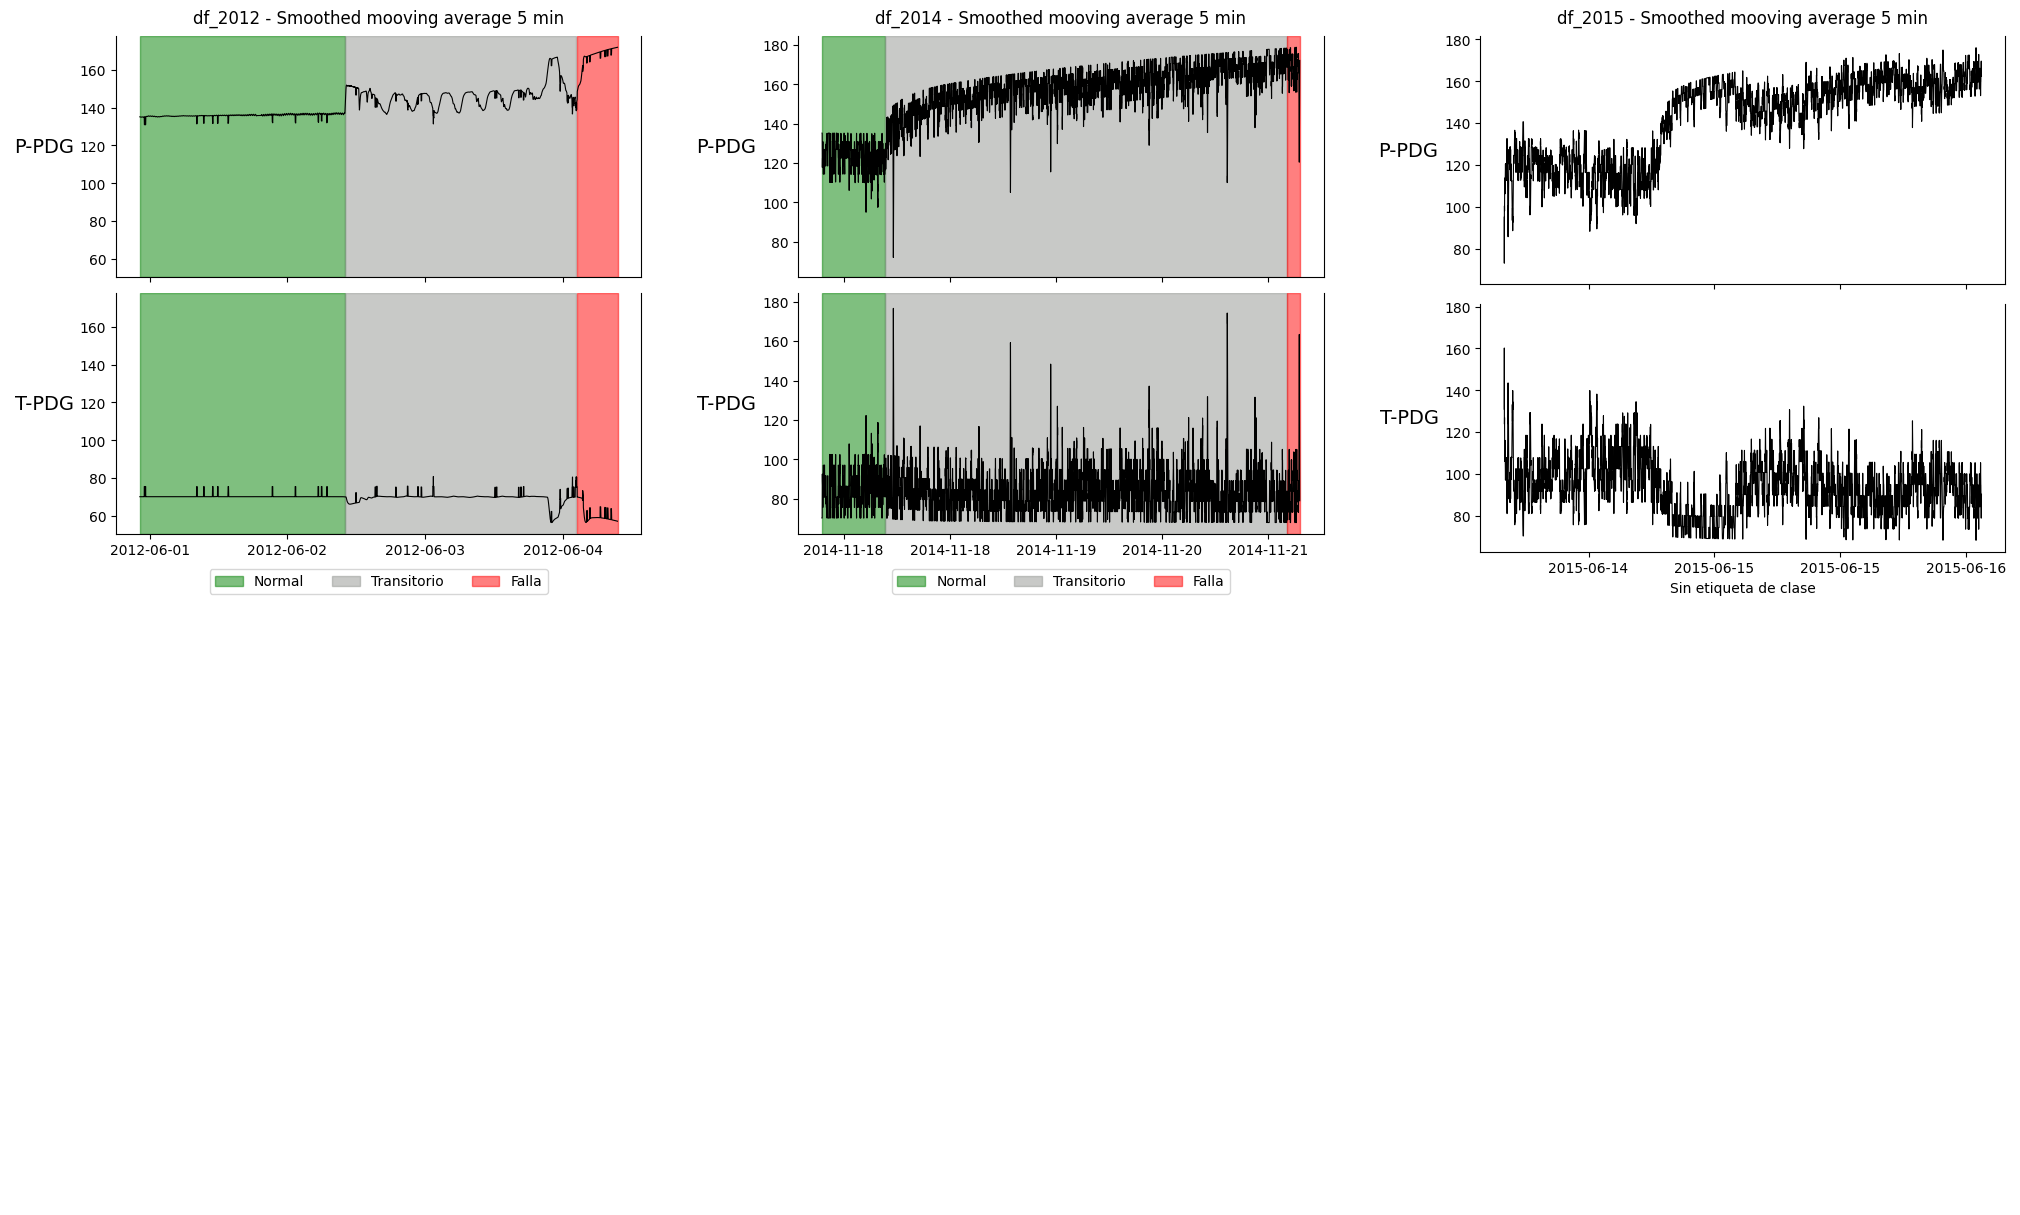

In [11]:
### Mooving average smoothing 5 min
j = 0
plot_columns = ['P-PDG','T-PDG']

filas = len(plot_columns)
fig = plt.figure(constrained_layout=True, figsize=(20, 12))
subfigs = fig.subfigures(filas, 3, wspace=0.07)
dfs = {'df_2012_pdg_ma': df_2012_pdg_ma,'df_2014_pdg_ma': df_2014_pdg_ma, 'df_2015_pdg_ma': df_2015_pdg_ma}
for key in ['df_2012_pdg_ma','df_2014_pdg_ma']:

  df = dfs[key]
  ax1 = subfigs.ravel()[j].subplots(filas, 1, sharex=True, sharey=True)

  Bgn_normal = df[df['class'] == "Normal"].index[0]
  End_normal = df[df['class'] == "Normal"].index[-1]
  Bgn_transient = df[df['class'] == "Transitorio"].index[0]
  End_transient = df[df['class'] == "Transitorio"].index[-1]
  Bgn_FaultySS = df[df['class'] == "Falla"].index[0]
  End_FaultySS = df[df['class'] == "Falla"].index[-1]

  for i in range(filas):
    ax1[i].plot(df[plot_columns].index,df[plot_columns].iloc[:,i],c='k',linewidth=0.8)
    ax1[i].set_ylabel(plot_columns[i],rotation=0,fontsize=14, ha='right') #ha: horizontal alignment

    ax1[i].spines["top"].set_visible(False)
    if Bgn_normal and End_normal:
      ax1[i].axvspan(Bgn_normal, End_normal, color='green', alpha=0.5, label='Normal')
    if Bgn_transient and End_transient:
      ax1[i].axvspan(Bgn_transient, End_transient, color=sns.xkcd_rgb['grey'], alpha=0.5, label='Transitorio')
    if Bgn_FaultySS and End_FaultySS:
      ax1[i].axvspan(Bgn_FaultySS, End_FaultySS, color='red', alpha=0.5, label='Falla')


    ax1[-1].xaxis.set_major_locator(plt.MaxNLocator(5))


  if df is df_2012_pdg_ma:
        ax1[0].set_title('df_2012 - Smoothed mooving average 5 min', y=1.02)

  elif df is df_2014_pdg_ma:
        ax1[0].set_title('df_2014 - Smoothed mooving average 5 min', y=1.02)

  #elif df is df_2015_pdg_ma:
        #ax1[0].set_title('df_2015 - Variables de temperatura', y=1.02)

   # Add a legend to the last subplot (or one of them)
  if ax1.size > 0: # Check if axes is not empty
      if len(ax1.shape) == 1: # Check if axes is a 1D array
              ax1[-1].legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncols=3) #ncols: numero de columnas del cuadro de legenda
      else: # If axes is a 2D array, pick one of the subplots to add the legend
              ax1[0, 0].legend(loc='best')



  j=j+1

df = df_2015_pdg_ma
ax1 = subfigs.ravel()[j].subplots(filas, 1, sharex=True, sharey=True)

for i in range(filas):
  ax1[i].plot(df[plot_columns].index,df[plot_columns].iloc[:,i],c='k',linewidth=0.8)
  ax1[i].set_ylabel(plot_columns[i],rotation=0,fontsize=14, ha='right')

  ax1[i].spines["top"].set_visible(False)


  ax1[-1].xaxis.set_major_locator(plt.MaxNLocator(5))

  if df is df_2015_pdg_ma:
    ax1[0].set_title('df_2015 - Smoothed mooving average 5 min', y=1.02)
    ax1[-1].set_xlabel('Sin etiqueta de clase', fontsize=10)

plt.show()

<Axes: xlabel='timestamp'>

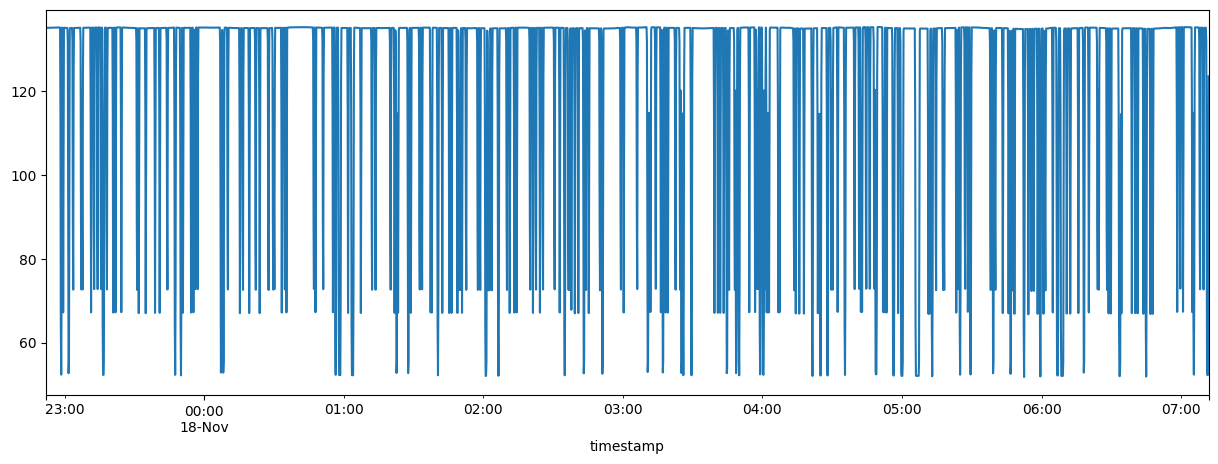

In [12]:
df2['P-PDG'][1000:4000].plot(figsize=(15, 5))

<Axes: xlabel='timestamp'>

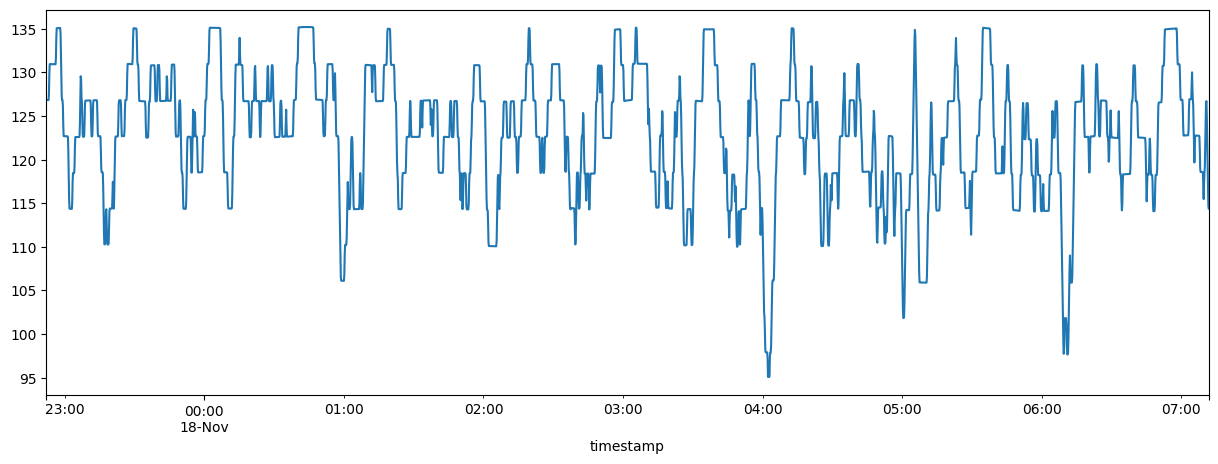

In [13]:
df_2014_pdg_ma['P-PDG'][1000:4000].plot(figsize=(15, 5))


In [14]:
#datasets generados
df_2012_pdg_ma.to_excel('df_2012_preproc_sm_1min.xlsx')
df_2014_pdg_ma.to_excel('df_2014_preproc_sm_1min.xlsx')
df_2015_pdg_ma.to_excel('df_2015_preproc_sm_1min.xlsx')

# 2. ROLLING WINDOW a dfs procesados

In [15]:
#Agrupación por variables
pressure_features = ['P-PDG', 'P-TPT', 'P-MON-CKP', 'P-JUS-CKP']
temp_features = ['T-PDG', 'T-TPT', 'T-MON-CKP']


In [16]:
#pressure_features_without_pdg = ['P-JUS-CKGL', 'P-JUS-CKP', 'P-MON-CKP', 'P-TPT'] #no se reliza fe a pdg
#temp_features_without_pdg = ['T-MON-CKP', 'T-TPT'] #no se reliza fe a pdg
#flow_
#Lags
columns_to_fe = pressure_features + temp_features

#Define window size
window_size = 6 #1 min

rolling_range_2012 = df1[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.max() - x.min()).add_suffix('_rg')  # rolling_rango_test = (df_test[columns_to_fe].rolling(window=window_size).max()-df_test[columns_to_fe].rolling(window=window_size).min()).add_suffix('_rango')
rolling_rate_2012 = df1[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.iloc[-1]/x.iloc[0] if (len(x) >= 2 and x.iloc[0]!=0) else 0.0).add_suffix('_rate')

rolling_range_2014 = df2[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.max() - x.min()).add_suffix('_rg')  # rolling_rango_test = (df_test[columns_to_fe].rolling(window=window_size).max()-df_test[columns_to_fe].rolling(window=window_size).min()).add_suffix('_rango')
rolling_rate_2014 = df2[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.iloc[-1]/x.iloc[0] if (len(x) >= 2 and x.iloc[0]!=0) else 0.0).add_suffix('_rate')

rolling_range_2015 = df3[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.max() - x.min()).add_suffix('_rg')  # rolling_rango_test = (df_test[columns_to_fe].rolling(window=window_size).max()-df_test[columns_to_fe].rolling(window=window_size).min()).add_suffix('_rango')
rolling_rate_2015 = df3[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.iloc[-1]/x.iloc[0] if (len(x) >= 2 and x.iloc[0]!=0) else 0.0).add_suffix('_rate')

In [17]:
#Concat
df_2012_preproc_rw = pd.concat([df1, rolling_range_2012, rolling_rate_2012], axis=1)
df_2014_preproc_rw = pd.concat([df2, rolling_range_2014, rolling_rate_2014], axis=1)
df_2015_preproc_rw = pd.concat([df3, rolling_range_2015, rolling_rate_2015], axis=1)

In [18]:
df_2012_preproc_rw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23954 entries, 2012-06-01 17:50:20 to 2012-06-04 12:22:30
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   P-JUS-CKP       23954 non-null  float64
 1   P-MON-CKP       23954 non-null  float64
 2   P-PDG           23954 non-null  float64
 3   P-TPT           23954 non-null  float64
 4   T-MON-CKP       23954 non-null  float64
 5   T-PDG           23954 non-null  float64
 6   T-TPT           23954 non-null  float64
 7   class           23954 non-null  object 
 8   P-PDG_rg        23954 non-null  float64
 9   P-TPT_rg        23954 non-null  float64
 10  P-MON-CKP_rg    23954 non-null  float64
 11  P-JUS-CKP_rg    23954 non-null  float64
 12  T-PDG_rg        23954 non-null  float64
 13  T-TPT_rg        23954 non-null  float64
 14  T-MON-CKP_rg    23954 non-null  float64
 15  P-PDG_rate      23954 non-null  float64
 16  P-TPT_rate      23954 non-null  float64
 

In [19]:
#dataset generados
df_2012_preproc_rw.to_excel('df_2012_preproc_rw_1min.xlsx')
df_2014_preproc_rw.to_excel('df_2014_preproc_rw_1min.xlsx')
df_2015_preproc_rw.to_excel('df_2015_preproc_rw_1min.xlsx')

In [20]:
df_2012_preproc_rw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23954 entries, 2012-06-01 17:50:20 to 2012-06-04 12:22:30
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   P-JUS-CKP       23954 non-null  float64
 1   P-MON-CKP       23954 non-null  float64
 2   P-PDG           23954 non-null  float64
 3   P-TPT           23954 non-null  float64
 4   T-MON-CKP       23954 non-null  float64
 5   T-PDG           23954 non-null  float64
 6   T-TPT           23954 non-null  float64
 7   class           23954 non-null  object 
 8   P-PDG_rg        23954 non-null  float64
 9   P-TPT_rg        23954 non-null  float64
 10  P-MON-CKP_rg    23954 non-null  float64
 11  P-JUS-CKP_rg    23954 non-null  float64
 12  T-PDG_rg        23954 non-null  float64
 13  T-TPT_rg        23954 non-null  float64
 14  T-MON-CKP_rg    23954 non-null  float64
 15  P-PDG_rate      23954 non-null  float64
 16  P-TPT_rate      23954 non-null  float64
 

# 2. UNDERSAMPLING a DFs procesados

In [21]:
df1 = pd.read_excel('/content/df_2012_preproc_10s.xlsx')
df2 = pd.read_excel('/content/df_2014_preproc_10s.xlsx')
#df3 = pd.read_excel('/content/df_2015_preproc_10s.xlsx')

In [22]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and 'target_column' is your class label
# Assuming 0 is the majority class and 1 is the minority class

minority_class1 = df1[df1['class'] == 'Falla']
minority_class2 = df1[df1['class'] == 'Normal']
majority_class = df1[df1['class'] == 'Transitorio']

# Determine the number of samples to keep from the majority class
n_minority = len(minority_class2)

# Randomly sample from the majority class
majority_undersampled = majority_class.sample(n=n_minority, random_state=1809, ignore_index=True) # random_state for reproducibility

# Combine the undersampled majority class with the minority class
df1_under = pd.concat([minority_class2, majority_undersampled, minority_class1 ])

# Shuffle the combined DataFrame to mix the classes
#balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df1_under['class'].value_counts())

class
Normal         10279
Transitorio    10279
Falla           2057
Name: count, dtype: int64


In [23]:
df1_under = df1_under.sort_values(by='timestamp')

In [24]:
df1_under = df1_under.set_index('timestamp')

In [25]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and 'target_column' is your class label
# Assuming 0 is the majority class and 1 is the minority class

minority_class1 = df2[df2['class'] == 'Falla']
minority_class2 = df2[df2['class'] == 'Normal']
majority_class = df2[df2['class'] == 'Transitorio']

# Determine the number of samples to keep from the majority class
n_minority = len(minority_class2)

# Randomly sample from the majority class
majority_undersampled = majority_class.sample(n=n_minority, random_state=1809, ignore_index=True) # random_state for reproducibility

# Combine the undersampled majority class with the minority class
df2_under = pd.concat([minority_class2, majority_undersampled, minority_class1 ])

# Shuffle the combined DataFrame to mix the classes
#balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df2_under['class'].value_counts())

class
Normal         4094
Transitorio    4094
Falla           824
Name: count, dtype: int64


In [26]:
df2_under = df2_under.sort_values(by='timestamp')

In [27]:
df2_under = df2_under.set_index('timestamp')

In [28]:
#dataset generados
df1_under.to_excel('df_2012_under.xlsx')
df2_under.to_excel('df_2014_under.xlsx')


In [29]:
df_train_under = pd.concat([df1_under, df2_under])

In [30]:
df_train_under['class'].value_counts()

,count
class,
Normal,14373
Transitorio,14373
Falla,2881


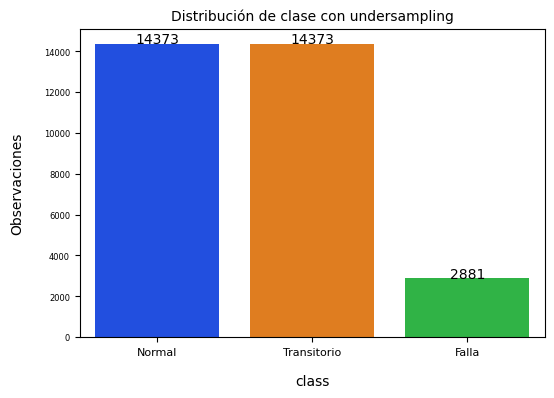

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(6,4))

# Create the countplot
ax = sns.countplot(x="class", data=df_train_under, palette = 'bright', hue='class', legend=False)

for p in ax.patches:
    # Get the height of the bar (which represents the count)
    height = p.get_height()

    # Add the text label on top of the bar
    # p.get_x() + p.get_width() / 2. places the text in the center of the bar
    # height + 0.1 places the text slightly above the bar
    ax.annotate(f'{int(height)}',  # Format as integer
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',  # Horizontal alignment: center, Vertical alignment: bottom
                xytext=(0, -2), textcoords='offset points') # Offset the text slightly upwards

plt.xticks(size=8)
plt.yticks(size=6)

plt.title('Distribución de clase con undersampling',size=10)
plt.ylabel('Observaciones', size=10)
ax.xaxis.set_label_coords(0.5, -.12)
ax.yaxis.set_label_coords(-0.12, 0.5)
#ax.set_xlabel('Condición', size=10, loc='center')
plt.show()

plt.show()

Rolling window a dfs con smoothing

In [32]:
#pressure_features_without_pdg = ['P-JUS-CKGL', 'P-JUS-CKP', 'P-MON-CKP', 'P-TPT'] #no se reliza fe a pdg
#temp_features_without_pdg = ['T-MON-CKP', 'T-TPT'] #no se reliza fe a pdg
#flow_
#Lags
columns_to_fe = pressure_features + temp_features

#Define window size
window_size = 6 #2 min

rolling_range_2012 = df_2012_pdg_ma[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.max() - x.min()).add_suffix('_rg')  # rolling_rango_test = (df_test[columns_to_fe].rolling(window=window_size).max()-df_test[columns_to_fe].rolling(window=window_size).min()).add_suffix('_rango')
rolling_rate_2012 = df_2012_pdg_ma[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.iloc[-1]/x.iloc[0] if (len(x) >= 2 and x.iloc[0]!=0) else 0.0).add_suffix('_rate')

rolling_range_2014 = df_2014_pdg_ma[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.max() - x.min()).add_suffix('_rg')  # rolling_rango_test = (df_test[columns_to_fe].rolling(window=window_size).max()-df_test[columns_to_fe].rolling(window=window_size).min()).add_suffix('_rango')
rolling_rate_2014 = df_2014_pdg_ma[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.iloc[-1]/x.iloc[0] if (len(x) >= 2 and x.iloc[0]!=0) else 0.0).add_suffix('_rate')

rolling_range_2015 = df_2015_pdg_ma[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.max() - x.min()).add_suffix('_rg')  # rolling_rango_test = (df_test[columns_to_fe].rolling(window=window_size).max()-df_test[columns_to_fe].rolling(window=window_size).min()).add_suffix('_rango')
rolling_rate_2015 = df_2015_pdg_ma[columns_to_fe].rolling(window=window_size, min_periods=1).apply(lambda x: x.iloc[-1]/x.iloc[0] if (len(x) >= 2 and x.iloc[0]!=0) else 0.0).add_suffix('_rate')

In [33]:
#Concat
df_2012_preproc_sm_rw = pd.concat([df_2012_pdg_ma, rolling_range_2012, rolling_rate_2012], axis=1)
df_2014_preproc_sm_rw = pd.concat([df_2014_pdg_ma, rolling_range_2014, rolling_rate_2014], axis=1)
df_2015_preproc_sm_rw = pd.concat([df_2015_pdg_ma, rolling_range_2015, rolling_rate_2015], axis=1)

In [34]:
df_2012_preproc_sm_rw.to_excel('df_2012_preproc_sm_rw.xlsx')
df_2014_preproc_sm_rw.to_excel('df_2014_preproc_sm_rw.xlsx')
df_2015_preproc_sm_rw.to_excel('df_2015_preproc_sm_rw.xlsx')